### 00. Dependencies

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

from fastai.vision.all import *

from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.nn as nn
import torch
from PIL import Image
import matplotlib.pyplot as plt

### 01. Data Prep

In [2]:
train_ds = datasets.FashionMNIST(root = './data', train = True, download = True)
test_ds = datasets.FashionMNIST(root='./data', train = False,download= True)

print(f'No of the images in train dataset:{len(train_ds)}')
print(f'No of the images in test dataset:{len(test_ds)}')

No of the images in train dataset:60000
No of the images in test dataset:10000


In [3]:
# Displaying an image
img = train_ds[0][0]
img
#converting image to numbers
img_arr = np.array(img)
shoe_df = pd.DataFrame(img_arr)
shoe_df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13,73,0,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,36,136,127,62,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,0,0,6,0,102,204,176,134,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,236,207,178,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,0,1,0,69,207,223,218,216,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,1,1,0,200,232,232,233,229,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,183,225,216,223,228,235,227,224,222,224,221,223,245,173,0


In [4]:
# Converting images to tensors
transform = transforms.Compose([transforms.PILToTensor()])

train_x_tens = torch.stack([transform(img) for img, _ in train_ds])
valid_x_tens  = torch.stack([transform(img) for img, _ in test_ds])


train_y_tens = torch.tensor([target for _,target in train_ds])
valid_y_tens = torch.tensor([target for _,target in test_ds])

In [5]:
# #One Hot encoding output features
# train_y = F.one_hot(train_y_tens, num_classes = 10)
# valid_y = F.one_hot(valid_y_tens, num_classes = 10)

# Converting between 0 and 1
train_x_tens = train_x_tens.float()/255
valid_x_tens = valid_x_tens.float()/255

In [6]:
train_x = train_x_tens.view(-1,28*28)
valid_x = valid_x_tens.view(-1,28*28)

#Final Train and valid datasets
fin_train_ds = list(zip(train_x,train_y_tens))
fin_valid_ds = list(zip(valid_x,valid_y_tens))

batch_size = 1000
train_dl = DataLoader(fin_train_ds, batch_size,shuffle = True)
valid_dl = DataLoader(fin_valid_ds, batch_size,shuffle = True)

### 02. Building a one layer simple Linear model

In [7]:
def init_params(shape):
    para = torch.randn(shape).requires_grad_()
    return para

def linear1(xb):
    return xb@weights + bias




def fashion_mnist_loss(predictions,actuals):    
    loss = nn.CrossEntropyLoss()
    loss = loss(predictions,actuals)
    return loss

def calc_gradient(xb,yb,model):
    loss  = fashion_mnist_loss(model(xb),yb)
    loss.backward()

def calc_accuracy(preds,actuals):
    apply_sm = nn.Softmax(dim = 1)
    preds = apply_sm(preds)
    fin_preds = torch.argmax((preds>0.5).float(), dim=1)
    accuracy = (actuals == fin_preds).float().mean()
    return accuracy

def calc_validate_epoch(model):
    valid_accs = [calc_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(valid_accs).mean().item(), 5)
    

class Optimizer:
    def __init__(self,params,lr):
        self.params = list(params)
        self.lr = lr
    def run_one_batch(self,*args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr
            p.grad_ = None
    def zero_grad(self, *args, **kwargs):
        for p in self.params : p.grad = None


def train_one_epoch(model):
    for xb, yb in train_dl:
        calc_gradient(xb,yb,model)
        opt.run_one_batch()
        opt.zero_grad()
        
def train_model(model, epochs):
    for i in range(epochs):
        train_one_epoch(model)
        valid_accuracy = calc_validate_epoch(model)
        print(f'Training loss :{round(fashion_mnist_loss(linear1(train_x),train_y_tens).item(),5)}|| Validation set accuracy: {valid_accuracy}')
        
#00.Settning up model assumptions & Dataloaders
lr = 0.01
epochs = 30





# 01. Initializing weights & biases
weights = init_params((28*28,10))
bias = init_params((1))



#02. Setting up Dataloader
opt = Optimizer([weights,bias], lr)

train_model(linear1,epochs)

    





    

Training loss :12.23027|| Validation set accuracy: 0.0707
Training loss :9.22188|| Validation set accuracy: 0.09
Training loss :7.49834|| Validation set accuracy: 0.1226
Training loss :6.46686|| Validation set accuracy: 0.1645
Training loss :5.69507|| Validation set accuracy: 0.2023
Training loss :5.0996|| Validation set accuracy: 0.2423
Training loss :4.63516|| Validation set accuracy: 0.2791
Training loss :4.26955|| Validation set accuracy: 0.3125
Training loss :3.97778|| Validation set accuracy: 0.3446
Training loss :3.74195|| Validation set accuracy: 0.3658
Training loss :3.54852|| Validation set accuracy: 0.3906
Training loss :3.38733|| Validation set accuracy: 0.4115
Training loss :3.251|| Validation set accuracy: 0.4282
Training loss :3.13435|| Validation set accuracy: 0.4429
Training loss :3.03335|| Validation set accuracy: 0.4561
Training loss :2.94495|| Validation set accuracy: 0.4694
Training loss :2.86691|| Validation set accuracy: 0.4795
Training loss :2.79744|| Validation

### 03. Building a Complex Neural Networks - Pytorch & FastAI

In [37]:
#Buildin a complex model
simple_ann = nn.Sequential(nn.Linear(28*28, 30),
                           nn.ReLU(),
                           nn.Linear(30, 20),
                           nn.ReLU(),
                           nn.Linear(20,10))


In [38]:


# Dataloaders
dls = DataLoaders(train_dl,valid_dl)

# Setting up learn
learn = Learner(dls,simple_ann,opt_func = SGD,loss_func = fashion_mnist_loss,
                metrics = calc_accuracy)

#Learner training
learn.fit(40,0.1)





epoch,train_loss,valid_loss,calc_accuracy,time
0,1.764581,1.239712,0.208700,00:00
1,1.188324,0.957501,0.493300,00:00
2,0.932400,0.774347,0.546300,00:00
3,0.804698,0.698229,0.641700,00:00
4,0.713626,0.686664,0.686100,00:00
5,0.658872,0.614590,0.726200,00:00
6,0.620338,0.592839,0.713900,00:00
7,0.585535,0.586586,0.734100,00:00
8,0.561994,0.653180,0.707900,00:00
9,0.542925,0.584048,0.757000,00:00


Final Accuracy:0.8220999836921692


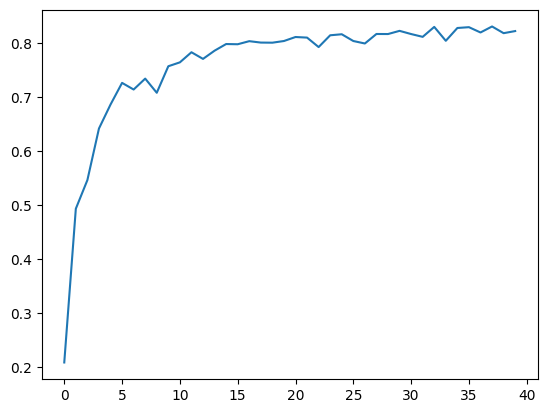

In [39]:

print(f'Final Accuracy:{learn.recorder.values[-1][2]}')
plt.plot(L(learn.recorder.values).itemgot(2));